In [9]:
import wandb
import matplotlib.pyplot as plt

plt.style.use('plot_style.txt')

In [10]:
api = wandb.Api()
runs = api.runs("justinpinkney/clip2latent")

In [11]:
import json


In [12]:
names = [
    "_noise_0",
    "_noise_0.5", 
    "",
    "_noise_1",
    "_noise_1.25",
    "_noise_1.5",
    "_noise_2",
]

names = ["baseline" + x for x in names]

In [13]:
rows = []
for run in runs:
    if run.name in names:
        cfg = json.loads(run.json_config)
        noise = cfg["data"]["value"]["embed_noise_scale"]
        rows.append((noise, run.history(keys=["val/text2im"]).max()[1]))

In [42]:
df

,0,1
6,0.00,0.239297
1,0.50,0.258738
4,0.75,0.280506
5,1.00,0.285839
3,1.25,0.276774
2,1.50,0.272930
0,2.00,0.272181


In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(rows)
df = df.sort_values(by=0)

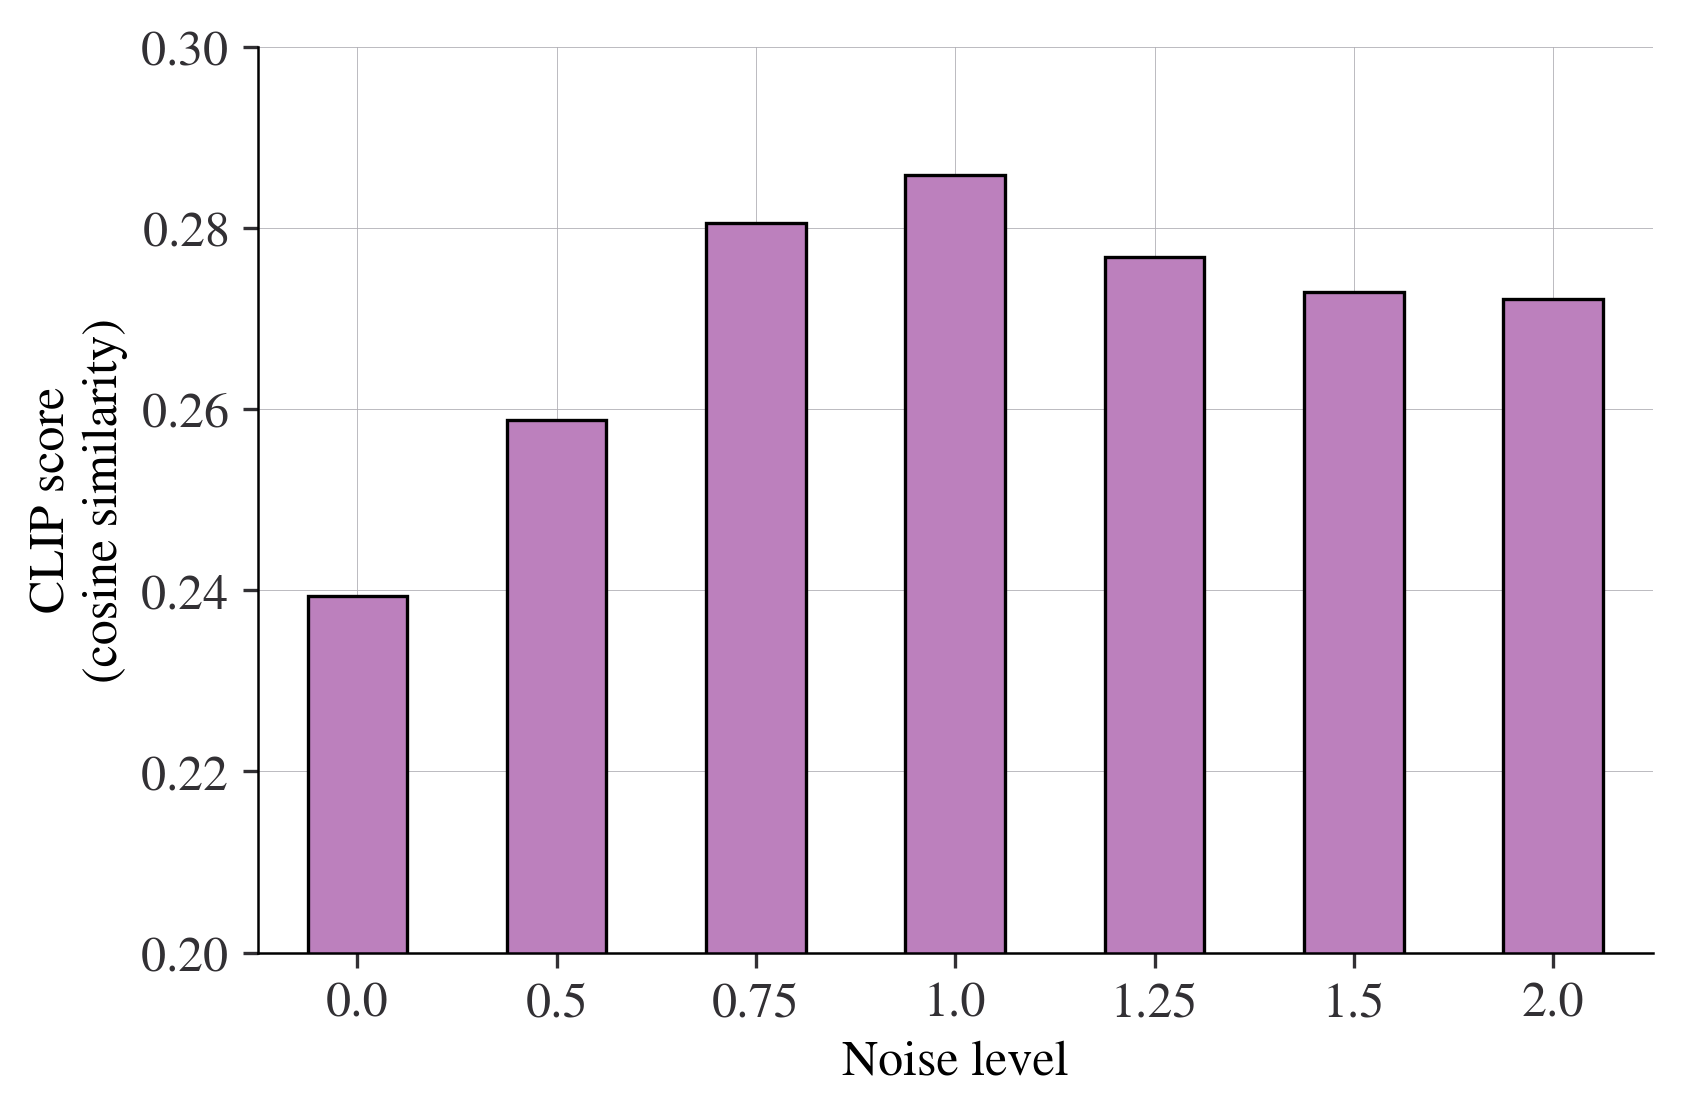

In [45]:
plt.rc('axes', axisbelow=True)
df.plot.bar(x=0, y=1, ylim=(0.20,0.3), xlabel="Noise level", ylabel="CLIP score\n(cosine similarity)")
plt.grid(linewidth=0.2)
plt.xticks(rotation=0, horizontalalignment="center")
ax = plt.gca()
ax.get_legend().remove()
plt.savefig('noise_plot.pdf',dpi=300)
plt.show()